<a href="https://colab.research.google.com/github/harsha-123-minn/car-price-prediction/blob/main/car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

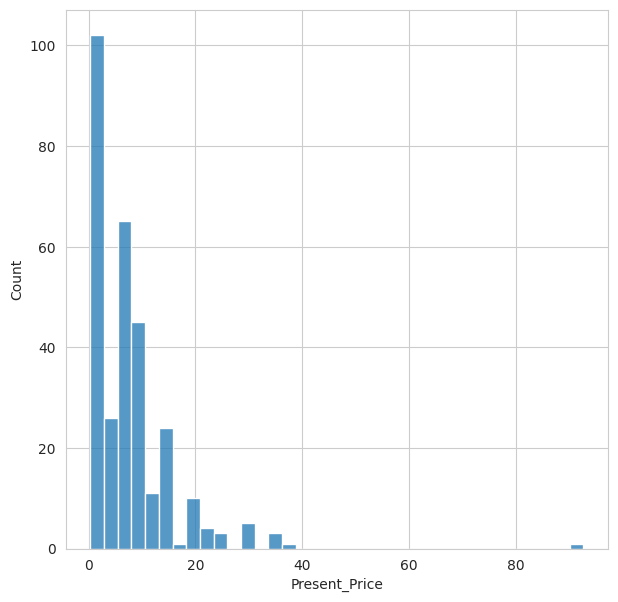

In [ ]:
cars=pd.read_csv("/content/CarPrice.csv")
print(cars.head())
print(cars.info())
print(cars.describe())
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
sns.histplot(cars.Present_Price)
plt.show()

In [ ]:
X = cars[['Car_Name','Year', 'Selling_Price','Present_Price','Driven_kms', 'Fuel_Type', 'Selling_type', 'Transmission', 'Owner']]
y = cars['Present_Price']
# subset all categorical variables
cat_var = X.select_dtypes(include=['object'])
# convert into dummies
dum_var = pd.get_dummies(cat_var, drop_first=True)
# drop categorical variables
X = X.drop(list(cat_var.columns), axis=1)
# concat dummy variables with X
X = pd.concat([X, dum_var], axis=1)


In [ ]:
# scaling the features
from sklearn.preprocessing import scale
# In scaling the dataframe is converted to a numpy array
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns
# split into train and test
#from sklearn. import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
prediction=pd.DataFrame(predictions)

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=predictions))

0.2438625526268653


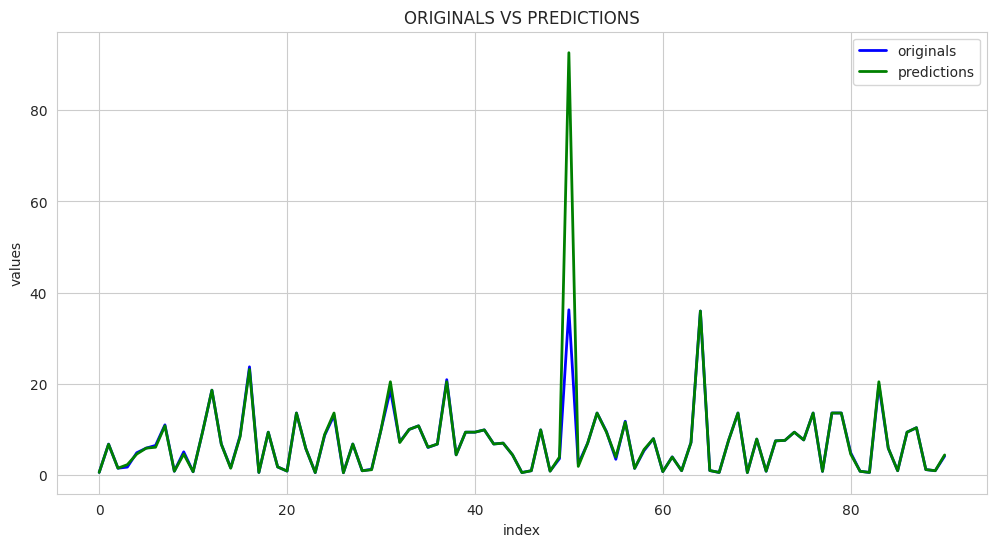

In [ ]:
test_index=y_test.reset_index()["Present_Price"]
ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="b")
ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
plt.show()